In [1]:
import tensorflow as tf

D:\progrmfilec\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
X_train = X_train/255
X_test = X_test/255

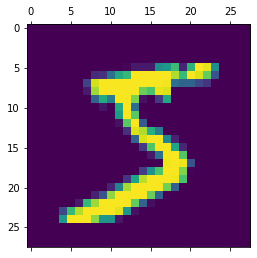

In [7]:
plt.matshow(X_train[0])

In [8]:

x_train_flatten = X_train.reshape(len(X_train), 28*28)
x_test_flatten = X_test.reshape(len(X_test), 28*28);


In [9]:
X_train.shape

(60000, 28, 28)

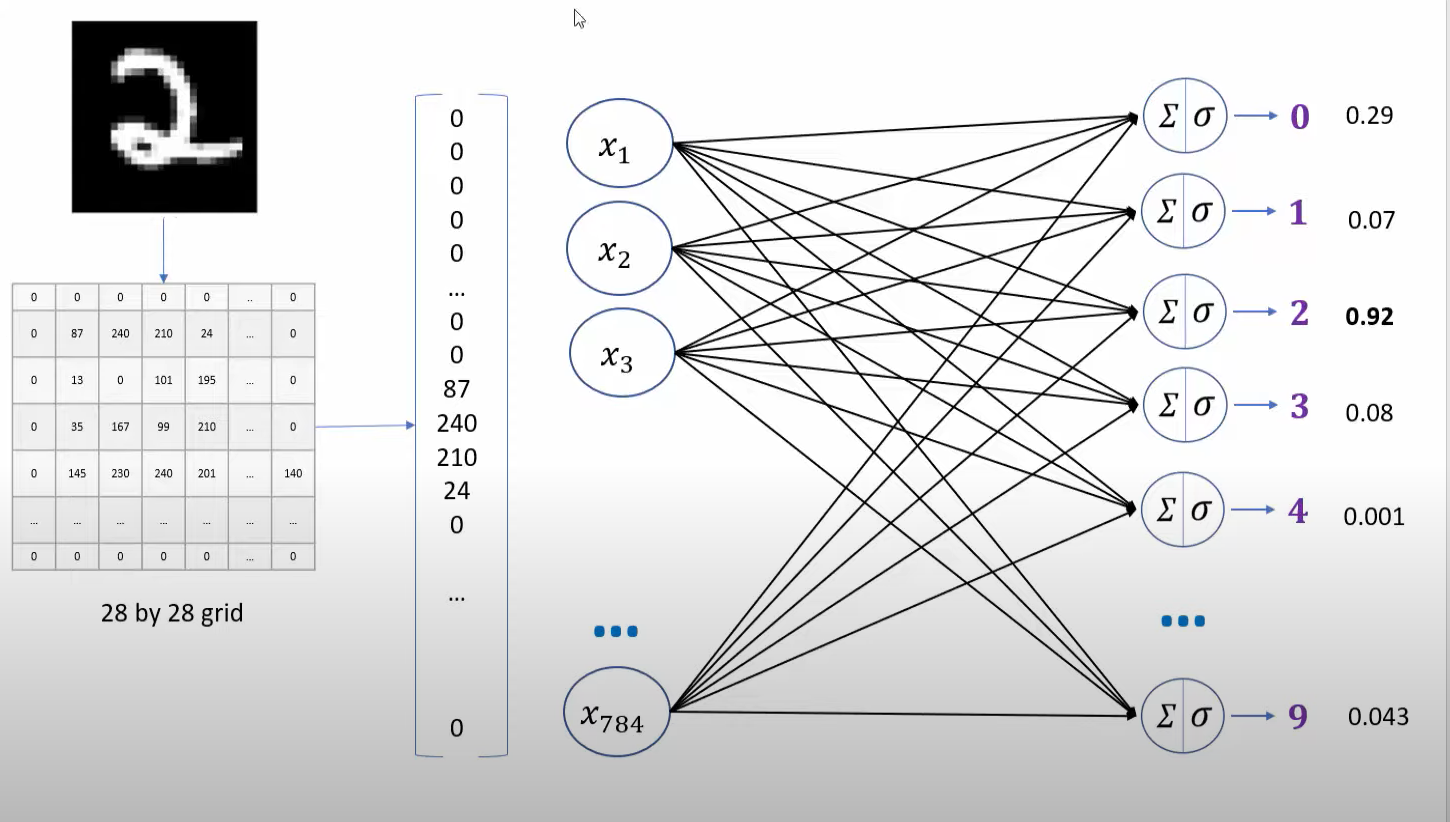

# Creating a simple neural network

In [11]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape= (784,), activation='sigmoid')

])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy']
)
model.fit(x_train_flatten, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4726 - accuracy: 0.8756
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3039 - accuracy: 0.9152
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2831 - accuracy: 0.9201
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2733 - accuracy: 0.9232
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2660 - accuracy: 0.9262
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2623 - accuracy: 0.9265
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2582 - accuracy: 0.9282
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2551 - accuracy: 0.9296
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2524 - accuracy: 0.9298
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.251

In [12]:
model.evaluate(x_test_flatten, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2662 - accuracy: 0.9265


[0.2662367820739746, 0.9265000224113464]

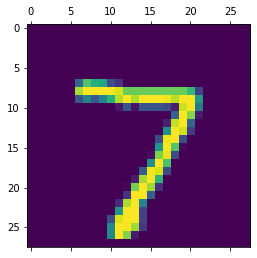

In [13]:
plt.matshow(X_test[0])

In [14]:
y_predicted = model.predict(x_test_flatten)
y_predicted[0]

313/313 [==============================] - 0s 975us/step


array([4.6120230e-03, 1.8205315e-08, 1.8997764e-02, 9.7721261e-01,
       1.6676504e-03, 1.6756928e-01, 2.8085513e-08, 9.9981320e-01,
       9.0564616e-02, 6.7058730e-01], dtype=float32)

In [15]:
np.argmax(y_predicted[0])

7

In [16]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [17]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    6,    6,    2,    1,    0],
       [   0, 1117,    3,    3,    0,    1,    3,    2,    6,    0],
       [   5,    9,  930,   17,    8,    6,   11,    8,   34,    4],
       [   3,    0,   14,  929,    1,   29,    2,    9,   16,    7],
       [   1,    1,    5,    2,  916,    0,    8,    4,    9,   36],
       [   8,    2,    3,   31,    8,  791,   12,    5,   26,    6],
       [  13,    3,    8,    1,    7,   18,  905,    1,    2,    0],
       [   1,    6,   22,   11,    7,    1,    0,  944,    2,   34],
       [   8,   12,    6,   33,    9,   37,    9,    7,  842,   11],
       [  11,    8,    1,   12,   24,    9,    0,   12,    3,  929]])>

Text(69.0, 0.5, 'Actual')

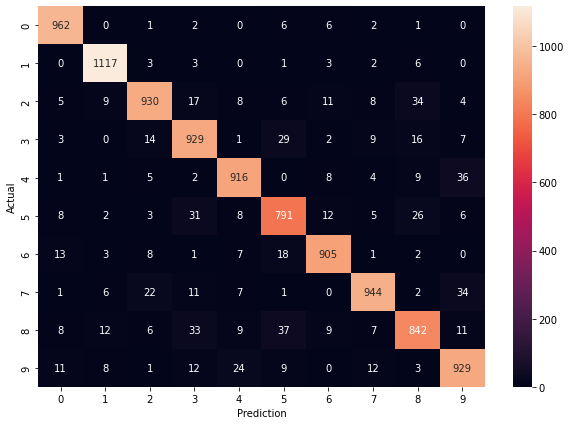

In [18]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot = True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual')

In [19]:
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10,  activation='sigmoid')

])
model1.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy']
)
model1.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2800 - accuracy: 0.9202
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1231 - accuracy: 0.9632
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0856 - accuracy: 0.9741
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0656 - accuracy: 0.9799
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0513 - accuracy: 0.9842
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0412 - accuracy: 0.9874
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0333 - accuracy: 0.9901
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0282 - accuracy: 0.9910
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0236 - accuracy: 0.9925
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.019

In [20]:
model1.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0803 - accuracy: 0.9767


[0.08029363304376602, 0.9767000079154968]

In [21]:
y_predicted1 = model.predict(x_test_flatten)
y_predicted1[0]

313/313 [==============================] - 0s 1ms/step


array([4.6120230e-03, 1.8205315e-08, 1.8997764e-02, 9.7721261e-01,
       1.6676504e-03, 1.6756928e-01, 2.8085513e-08, 9.9981320e-01,
       9.0564616e-02, 6.7058730e-01], dtype=float32)

In [22]:
y_predicted_labels1 = [np.argmax(i) for i in y_predicted1]
y_predicted_labels1[:5]

[7, 2, 1, 0, 4]

In [23]:
cm1 = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels1)
cm1



<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    6,    6,    2,    1,    0],
       [   0, 1117,    3,    3,    0,    1,    3,    2,    6,    0],
       [   5,    9,  930,   17,    8,    6,   11,    8,   34,    4],
       [   3,    0,   14,  929,    1,   29,    2,    9,   16,    7],
       [   1,    1,    5,    2,  916,    0,    8,    4,    9,   36],
       [   8,    2,    3,   31,    8,  791,   12,    5,   26,    6],
       [  13,    3,    8,    1,    7,   18,  905,    1,    2,    0],
       [   1,    6,   22,   11,    7,    1,    0,  944,    2,   34],
       [   8,   12,    6,   33,    9,   37,    9,    7,  842,   11],
       [  11,    8,    1,   12,   24,    9,    0,   12,    3,  929]])>

Text(69.0, 0.5, 'Actual')

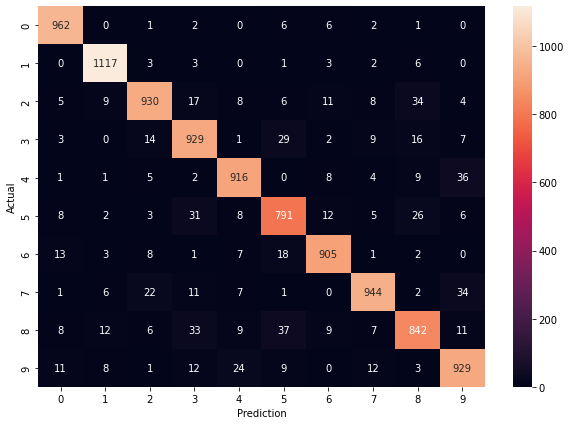

In [24]:
plt.figure(figsize = (10,7))
sn.heatmap(cm1,annot = True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual')